# JPEG compression

In [88]:
import os
import matplotlib.pyplot as plt

from PIL import Image

F-5C.jpg 677458 bytes


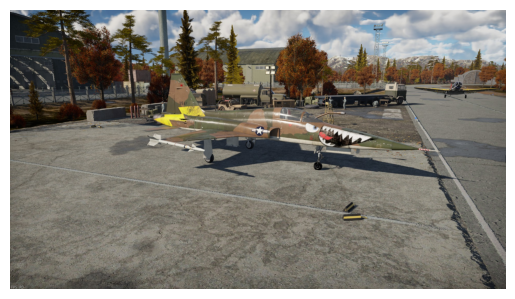

In [89]:
filename = "F-5C.jpg"
image = Image.open(filename)
size = os.path.getsize(filename)
print(filename, size, "bytes")
plt.axis('off')
plt.imshow(image)
plt.show()

Compressed_F-5C.jpg 152102 bytes


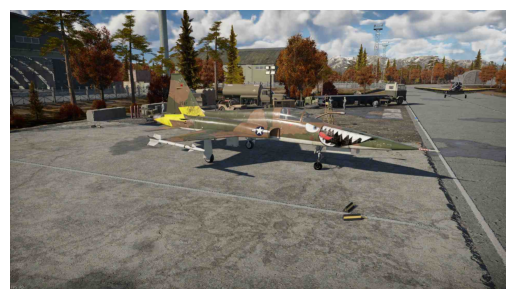

In [90]:
new_filename = "Compressed_F-5C.jpg"
image.save(new_filename, format='JPEG', quality=25)
new_image = Image.open(new_filename)
size = os.path.getsize(new_filename)
print(new_filename, size, "bytes")
plt.axis('off')
plt.imshow(new_image)
plt.show()

# GZIP Text Compression

In [91]:
import gzip

In [92]:
text = "Astartes.txt"
new_text = "Compressed_Astartes.gz"

with open(text, "rb") as original:
    content = original.read()
    with gzip.open(new_text, "wb") as compressed:
        compressed.write(content)
    
size_1 = os.path.getsize(text)
size_2 = os.path.getsize(new_text)
print (text, size_1, "bytes")
print (new_text, size_2, "bytes")

Astartes.txt 21886 bytes
Compressed_Astartes.gz 8587 bytes


# Huffman algorithm

In [93]:
def count_freq(text):
    freq = {}
    for char in text:
        if char in freq:
            freq[char] += 1
        else:
            freq[char] = 1
    return freq

In [94]:
def build_tree(freq):
    nodes = [[weight, [char, ""]] for char, weight in freq.items()]
    while len(nodes) > 1:
        left = nodes.pop(0)
        right = nodes.pop(0)
        for char in left[1:]:
            char[1] = "0" + char[1]
        for char in right[1:]:
            char[1] = "1" + char[1]
        nodes.append([left[0] + right[0]] + left[1:] + right[1:])
        nodes.sort()
    return nodes[0][1:]

In [95]:
def gen_codes(tree):
    codes = {}
    for char in tree:
        codes[char[0]] = char[1]
    return codes

In [96]:
def encode(text, codes):
    encoded_text = ""
    for char in text:
        encoded_text += codes[char]
    return encoded_text

In [97]:
def decode(encoded_text, tree):
    decoded_text = ""
    while encoded_text:
        for char in tree:
            if encoded_text.startswith(char[1]):
                decoded_text += char[0]
                encoded_text = encoded_text[len(char[1]):]
                break
    return decoded_text

In [98]:
file = "Astartes.txt"
encoded = "encoded_Astartes.txt"
decoded = "decoded_Astartes.txt"

with open(file, "r") as f:
    text = f.read()

freq = count_freq(text)
tree = build_tree(freq)
codes = gen_codes(tree)
encoded_text = encode(text, codes)

with open(encoded, "w") as f:
    f.write(encoded_text)

decoded_text = decode(encoded_text, tree)

with open(decoded, "w") as f:
    f.write(decoded_text)
    
size_before = os.path.getsize(file)
size_after = os.path.getsize(decoded)
print (file, size_before, "bytes")
print (decoded, size_after, "bytes")

Astartes.txt 21886 bytes
decoded_Astartes.txt 21886 bytes
